In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content

Mounted at /content/gdrive
/content


This is Bhavya Shah live and in person. I will be demonstrating the decision tree I created using sklearn.

First we will be importing the necessary libraries like pandas, numpy, matplotlib, etc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Then we will be importing the dataset from my google drive.
I have shuffled the dataset using the sample method of pandas

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Iris.csv')
df = pd.DataFrame(dataset)
df = df.sample(frac=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,24,5.1,3.3,1.7,0.5,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa


As Id is not an important or deterministic factor or attribute, we will remove it

In [ ]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,5.1,3.3,1.7,0.5,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa


Now let us take the unique values of our output and its count.
As each category of Iris has 50 samples hence this dataset is balanced


In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Now let us encode the output columns using the LabelEncoder class in sklearn library

In [ ]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,5.1,3.3,1.7,0.5,0
105,7.6,3.0,6.6,2.1,2
121,5.6,2.8,4.9,2.0,2
130,7.4,2.8,6.1,1.9,2
43,5.0,3.5,1.6,0.6,0


Now let us plot the various attributes against each other to visualize our data.

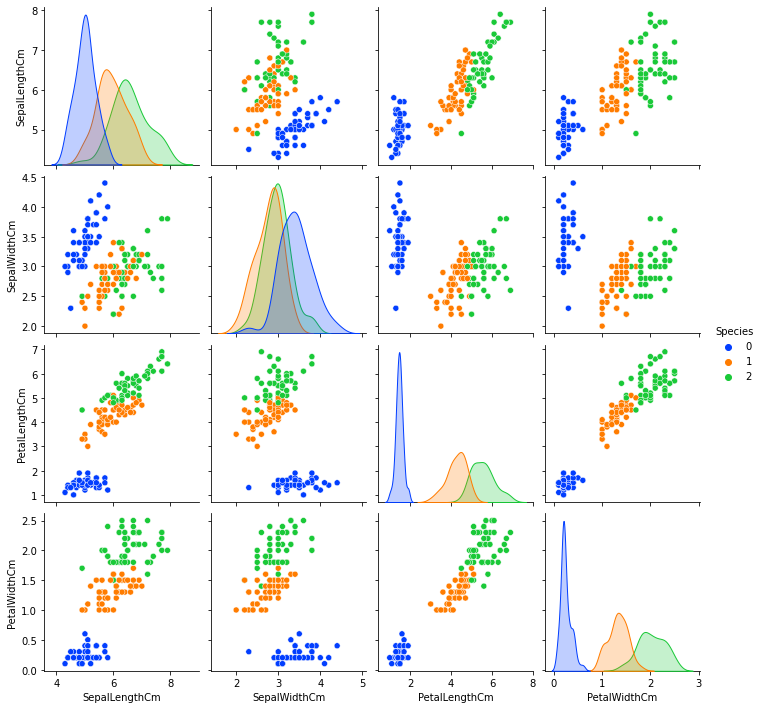

In [ ]:
sns.pairplot(data=df,
             hue='Species',
             palette='bright',
             vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],)

Let us now split our dataset into features(X) and labels(Y) and convert our features into numpy array of shape (150, 4)

In [ ]:
X = df.drop(columns=['Species'])
X = np.array(X, dtype='float32')
X = X.reshape(-1, 4)
Y = df['Species']
Y = np.array(Y, dtype='int32')

Now let us train our decision tree model with hyperparameters max_depth and min_samples_split and take the score of accuracy

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=10)
tree.fit(X, Y)
tree.score(X, Y)

0.98

Let us plot the decision tree we created

[Text(421.6000000000001, 489.24, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]\nclass = Iris Setosa'),
 Text(316.20000000000005, 380.52000000000004, 'gini = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0, 0.0]\nclass = Iris Setosa'),
 Text(527.0000000000001, 380.52000000000004, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 66.7%\nvalue = [0.0, 0.5, 0.5]\nclass = Iris Versicolor'),
 Text(316.20000000000005, 271.8, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 36.0%\nvalue = [0.0, 0.907, 0.093]\nclass = Iris Versicolor'),
 Text(210.80000000000004, 163.08000000000004, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 32.0%\nvalue = [0.0, 0.979, 0.021]\nclass = Iris Versicolor'),
 Text(105.40000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 31.3%\nvalue = [0.0, 1.0, 0.0]\nclass = Iris Versicolor'),
 Text(316.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 0.7%\nvalue = [0.0, 0.0, 1.0]\nclass = Iris Viginica'),
 Text(421.6000000000001, 163.08

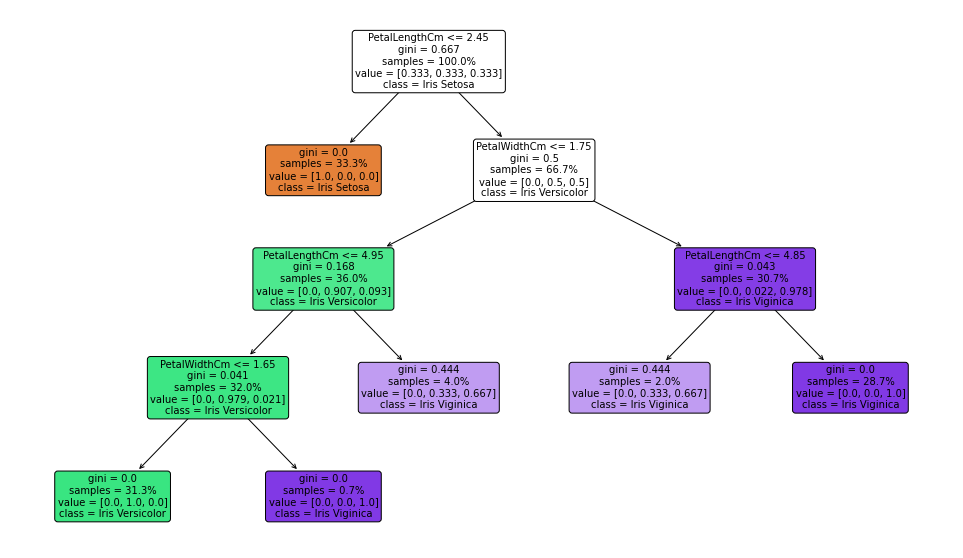

In [ ]:
fig = plt.figure(figsize=(17, 10))
plot_tree(tree,
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=['Iris Setosa', 'Iris Versicolor', 'Iris Viginica'],
          filled=True,
          proportion=True,
          rotate=True,
          rounded=True,
          fontsize=10)

The boxes represent the nodes of our tree.
Thank you